In [2]:
#pip install beautifulsoup4

In [3]:
#pip install lxml

In [4]:
#pip install selenium

In [5]:
import numpy as np
import pandas as pd 
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import lxml
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import date

In [6]:
current_year = date.today().year + 1
previous_year = (current_year - 2) 

print(current_year)
print(previous_year)

2023
2021


In [7]:
Adventure = requests.get('https://flixable.com/genre/action-and-adventure/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
AdventureSoup = BeautifulSoup(Adventure.text, 'html')

Children = requests.get('https://flixable.com/genre/children-and-family-movies/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
ChildSoup = BeautifulSoup(Children.text, 'html')

Comedy = requests.get('https://flixable.com/genre/comedies/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
ComedySoup = BeautifulSoup(Comedy.text, 'html')

Docu = requests.get('https://flixable.com/genre/documentaries/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
DocuSoup = BeautifulSoup(Docu.text, 'html')

Drama = requests.get('https://flixable.com/genre/dramas/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
DramaSoup = BeautifulSoup(Drama.text, 'html')

Horror = requests.get('https://flixable.com/genre/horror-movies/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
HorrorSoup = BeautifulSoup(Horror.text, 'html')

Romantic = requests.get('https://flixable.com/genre/romantic-movies/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
RomanticSoup = BeautifulSoup(Romantic.text, 'html')

Sports = requests.get('https://flixable.com/genre/sports-movies/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
SportsSoup = BeautifulSoup(Sports.text, 'html')

Thrillers = requests.get('https://flixable.com/genre/thrillers/?min-rating=0&audio=en&min-year='+str(previous_year)+'&max-year='+str(current_year)+'&order=rating#filterForm')
ThrillersSoup = BeautifulSoup(Thrillers.text, 'html')



In [8]:
Categories = [AdventureSoup, ChildSoup, ComedySoup, DocuSoup, DramaSoup, HorrorSoup, RomanticSoup, SportsSoup, ThrillersSoup]

movies = []
years_all = []
names = []
years = []
ranking = []
list = []
numb = [0,1,2,3,4,5,6,7,8]

for i in Categories:
  list.append(i)

#Get names:
for item in numb:
  movies.extend(list[item].find_all('h5', class_="card-title"))

for name in movies:
  names.append(name.text)

#Get years and ranking
for item in numb:
  years_all.extend(list[item].find_all('div', class_="card-description"))

for year in years_all:
  years.append(year.text.split()[0])
  ranking.append(year.text.split()[-1])


In [9]:
rank = []
for i in range(len(years)):
    if years[i] != ranking[i]:
        rank.append(ranking[i])
    else:
        rank.append("nan") #we need to add something so that it matches len(years). could be anything


In [10]:
DF = pd.DataFrame()
DF['Movies'] = names
DF['Rating'] = rank 
DF['Year'] = years

DF['Year'] = DF['Year'].astype(int) 


In [11]:
DF['Rating'] = DF['Rating'].str.rstrip('/10') #removing /10 from all ratings so that we can convert them to numbers

DF['Rating'] = pd.to_numeric(DF['Rating'], errors='coerce') #convert str into number


In [12]:
DF

,Movies,Rating,Year
0,Green Snake,6.7,2021
1,New Gods: Nezha Reborn,6.7,2021
2,Against The Ice,6.6,2022
3,Sooryavanshi,6.6,2021
4,Red Notice,6.5,2021
...,...,...,...
324,Hostage House,NaN,2021
325,In for a Murder,NaN,2021
326,Kingdom: Ashin of the North,NaN,2021
327,Lethal Love,NaN,2021


Are more recent movies worse rated?

In [13]:
#Grouped DF

GR_DF = DF.groupby(['Rating'], as_index = False).agg({'Movies': [ 'count'], 'Year': ['median']})

GR_DF.head()

,Rating,Movies,Year
,,count,median
0,2.7,1,2021.0
1,2.8,1,2021.0
2,3.3,1,2021.0
3,3.4,1,2021.0
4,3.6,1,2021.0


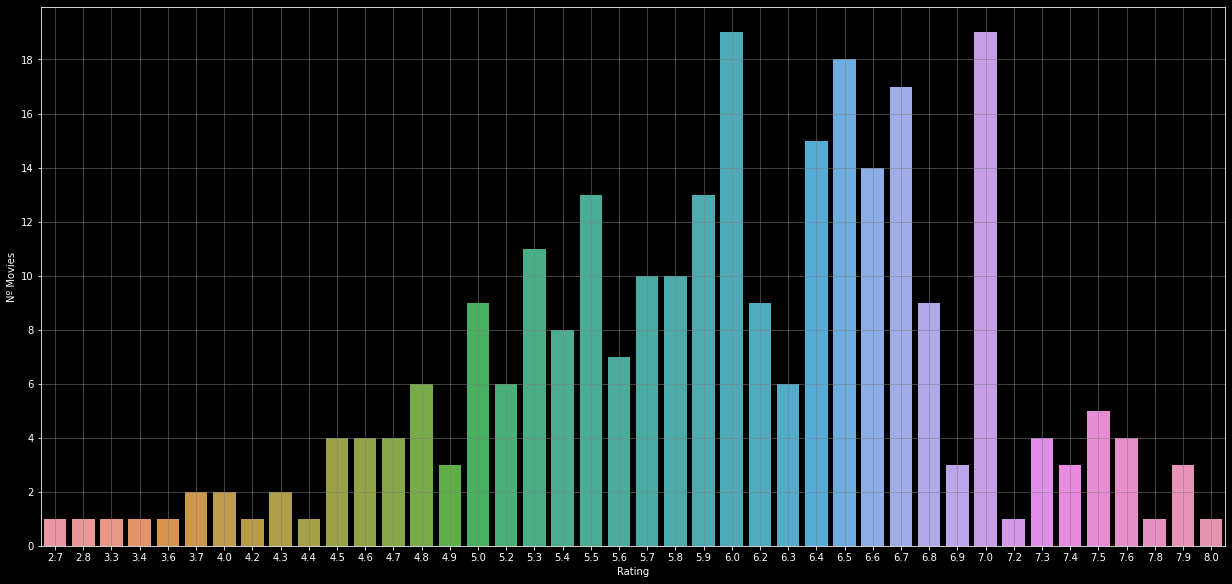

In [28]:
#Plot n Movies by rating

plt.style.use('dark_background')
plt.figure(figsize = (17,8),constrained_layout = True)
plt.locator_params(axis="y", nbins=10)

ax = sns.barplot(data = GR_DF, x = 'Rating', y = GR_DF['Movies']['count'])
ax.set_xlabel('Rating')
ax.set_ylabel('Nº Movies')

plt.grid(True, color = "grey", linewidth = "0.5", linestyle = "-")

plt.show()

#Looks like normal distribution

In [32]:
#Get 10 best rated movies
print(DF.sort_values(by=['Rating'], ascending=False, ignore_index=True).head(10))

                                           Movies  Rating  Year
0                                      Seaspiracy     8.0  2021
1                             The Sparks Brothers     7.9  2021
2  Breaking Boundaries: The Science Of Our Planet     7.9  2021
3                 7 Yards: The Chris Norton Story     7.9  2021
4                      Amy Tan: Unintended Memoir     7.8  2021
5                    Untold: Malice at the Palace     7.6  2021
6                              Tick, tick...BOOM!     7.6  2021
7                                         Dhamaka     7.6  2021
8                    Untold: Malice at the Palace     7.6  2021
9                          Untold: Breaking Point     7.5  2021
